In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [21]:
#Load IMDB Dataset with review, sentiment columns.
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
print(df.describe()) 

# Preperation of Data with TfidfVectorizer
y = df.sentiment.replace({"positive":1, "negative":0}) 
x = df.review 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

bag = TfidfVectorizer(max_features=30000, use_idf = True)
X_train_tf = bag.fit_transform(X_train)
X_test_tf = bag.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


((40000,), (10000,), (40000,), (10000,))

# MACHINE LEARNING MODELING : Logistic Regression

In [22]:
# MACHINE LEARNING : Logistic Regression
mdl = LogisticRegression(solver='saga', max_iter=3000, n_jobs = -1)
mdl.fit(X_train_tf, y_train)
preds = mdl.predict(X_test_tf)

print("\nMACHINE LEARNING : Logistic Regression PEerformance Results\n")
print("\nclassification_reports:\n", classification_report(y_test, preds))
print("\nr2_score:\n", r2_score(y_test, preds))
print("\nconfusion_matrix\n", confusion_matrix(y_test, preds))

# Lets Try Logistic Regression Model

test1 = "I really didn't enjoy watching this. Very disappointed."  
test2 = "What a wonderful movie. I enjoyed a lot watching this with my kids."
test3 = "No worry. You haven't missed anything if you haven't watched this."
test4 = "I regret watching this. This is the worst movie I've ever seen."

result1 = mdl.predict(bag.transform([test1]))  
result2 = mdl.predict(bag.transform([test2]))
result3 = mdl.predict(bag.transform([test3]))
result4 = mdl.predict(bag.transform([test4]))

print("\nLogistic Regression ML Model Test Prediction Results\n")
print("result1: ", result1, "result2: ", result2, "result3: ", result3, "result4: ", result4)


MACHINE LEARNING : Logistic Regression PEerformance Results


classification_reports:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


r2_score:
 0.5992

confusion_matrix
 [[4444  556]
 [ 446 4554]]

Logistic Regression ML Model Test Prediction Results

result1:  [0] result2:  [1] result3:  [0] result4:  [0]


# DEEP LEARNING MODELING

In [23]:
# DEEP LEARNING MODELING

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_tf.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)), 
    layers.Dropout(0.2), 
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_tf, y_train, epochs=4, batch_size=2000, validation_split=0.1)

# MODEL EVALUATION
loss, accuracy = model.evaluate(X_train_tf, y_train)
print("\nDL MODEL EVALUATION\n:")
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(X_test_tf, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_dl = (model.predict(X_test_tf) > 0.5).astype("int32")

# Print classification report and confusion matrix for the deep learning model
print("\nDeep Learning Model - Classification Report:")
print(classification_report(y_test, y_pred_dl))
print("\nr2_score(y_test, y_pred: ")
print(r2_score(y_test, y_pred_dl))
print("\nDeep Learning Model - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dl))

# Test the model with new data
result1_dl = (model.predict(bag.transform([test1])) > 0.5).astype("int32")
result2_dl = (model.predict(bag.transform([test2])) > 0.5).astype("int32")
result3_dl = (model.predict(bag.transform([test3])) > 0.5).astype("int32")
result4_dl = (model.predict(bag.transform([test4])) > 0.5).astype("int32")

print("\nDeep Learning DL Model Test Prediction Results:")
print("result1: ", result1_dl, "result2: ", result2_dl, "result3: ", result3_dl, "result4: ", result4_dl)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 532ms/step - accuracy: 0.6151 - loss: 1.1807 - val_accuracy: 0.8533 - val_loss: 0.8070
Epoch 2/4
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 531ms/step - accuracy: 0.8512 - loss: 0.7457 - val_accuracy: 0.8955 - val_loss: 0.5044
Epoch 3/4
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 465ms/step - accuracy: 0.8976 - loss: 0.4968 - val_accuracy: 0.9020 - val_loss: 0.4740
Epoch 4/4
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 445ms/step - accuracy: 0.9316 - loss: 0.4278 - val_accuracy: 0.9020 - val_loss: 0.4550
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9616 - loss: 0.3614

DL MODEL EVALUATION
:
Train Loss: 0.3705
Train Accuracy: 0.9555
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8987 - loss: 0.4685
Test Loss: 0.4667
Test Accuracy: 0.9007
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Deep Learning Model - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5000
           1       0.90      0.90  

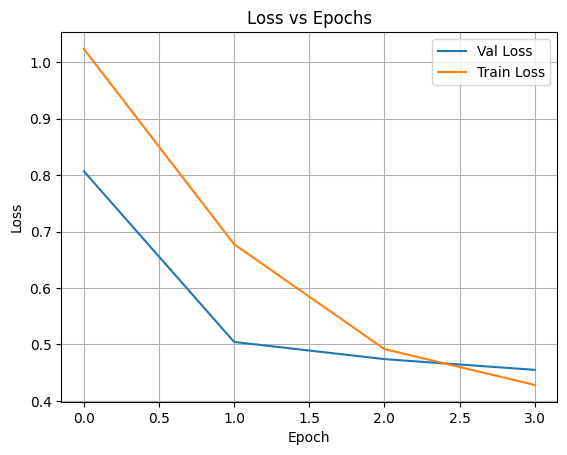

In [25]:
plt.plot(history.history["val_loss"], label="Val Loss")
plt.plot(history.history["loss"], label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.savefig("grafik1.png", dpi=300, bbox_inches='tight')
plt.show()